In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline

from tslearn.clustering import silhouette_score

from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km
from utils import k_shape as ks
from utils.statics_func import *

2.5.1


In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)

#RG24 = ss.SeriesSupp(cwd, factory, "RG24")
#RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


In [3]:
GW.import_dataset()
#RG24.import_dataset()

Load csv_prepro\GW: Done


In [4]:
#cluster_GW = km.Kmean(GW)
cluster_GW = ks.Kshape(GW)

In [5]:
name_file = openfile_dialog()
cluster_GW.read_cluster(name_file[0])

In [ ]:
#name_file = "Kshape_GW_[2011, 2012, 2013, 2014, 2015][1, 2, 3, 4, 5, 12]_True_5"
#cluster_GW.read_cluster("cluster\\29_06\\" + name_file + ".pkl")

## Recherche et test sur le SAX

In [6]:
from prefixspan import PrefixSpan
from utils import sax_engine as sq
from utils import prefix_span as ps
from utils import pygapbide as pygb

In [7]:
se = sq.SaxEngine(5, 67)

In [33]:
se.reset()

In [50]:
lentrace = se.raw_data[0].shape[0]
lentrace

134

In [35]:
se.set_nb_symbol(8)
se.set_nb_segment(40)

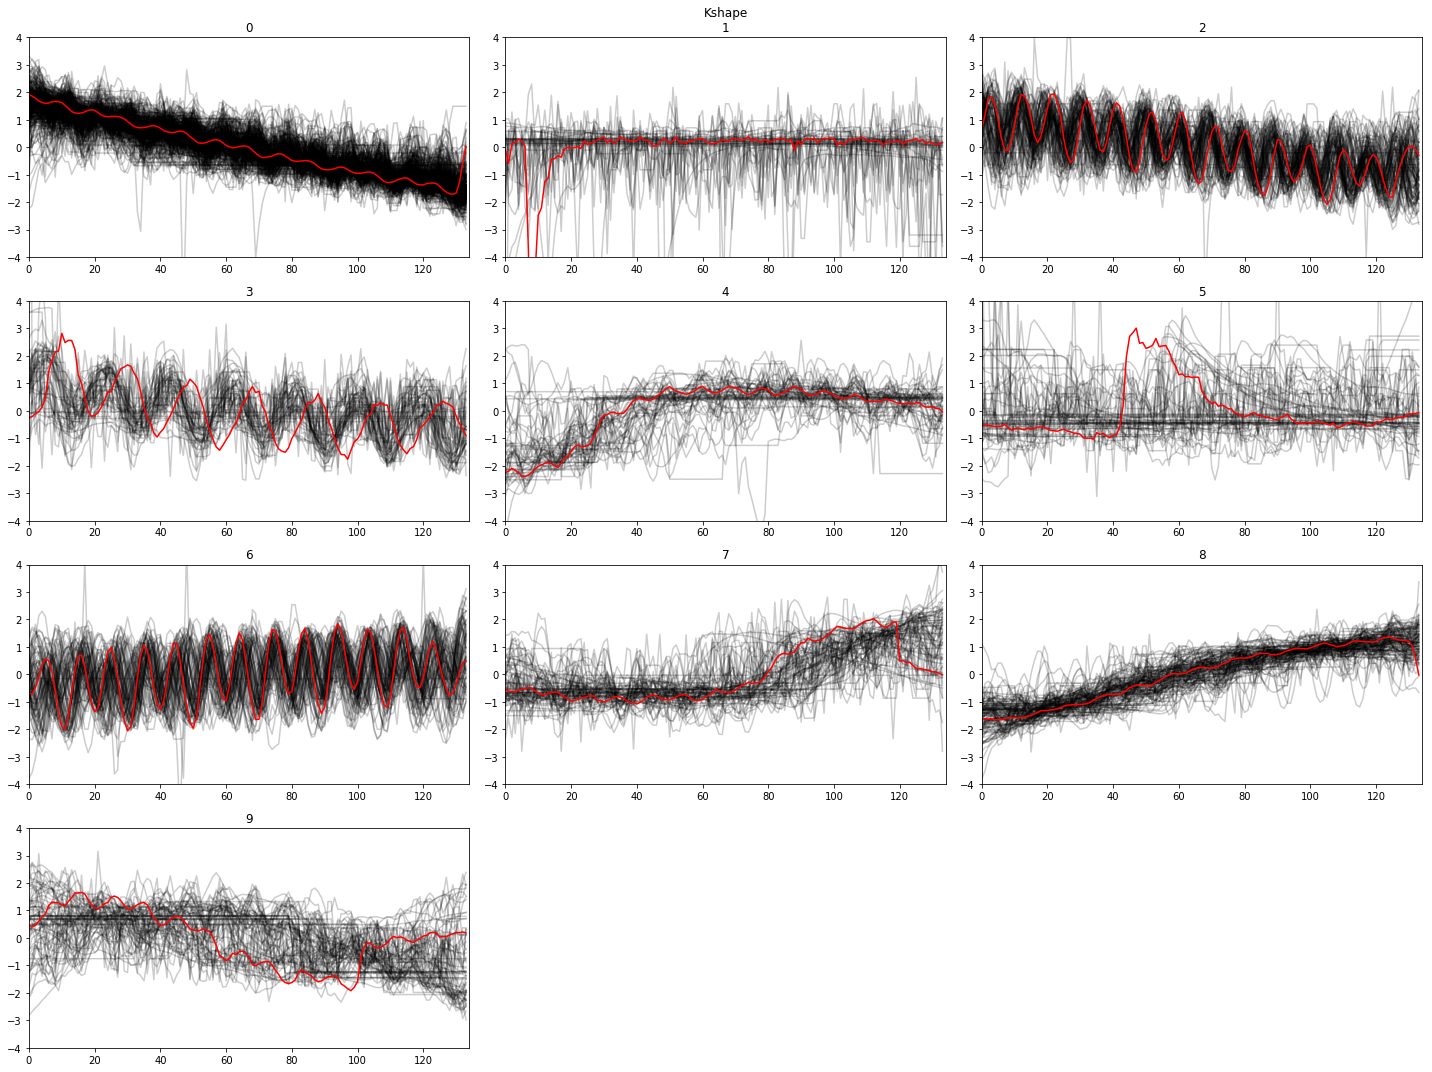

In [36]:
cluster_GW.ploter.plot_cluster_light()

In [37]:
all_ts = cluster_GW.get_cluster_n(3)

In [38]:
se.fit(all_ts)
se.run()

In [39]:
psm = ps.PrefixSpanManager(se)

In [40]:
psm.run()
psm.ps.minlen, psm.ps.maxlen = 5, 10

In [41]:
len(psm.process_data)

47

In [42]:
psm.topk(5)

[(39, [6, 6, 1, 1, 2]),
 (39, [6, 6, 3, 2, 2]),
 (39, [6, 6, 4, 1, 2]),
 (39, [6, 6, 4, 2, 1]),
 (38, [6, 6, 3, 1, 2])]

In [43]:
psm.plot(psm.topk(5))

In [44]:
n = 0

In [45]:
traw = psm.se_instance.raw_data[n]
traw.shape

(134, 1)

In [46]:
tinv = psm.se_instance.sax_data_inv[n]
tstr = psm.se_instance.sax_data[n]
tinv.shape

(1, 134, 1)

In [47]:
#tinv

In [48]:
#len(psm.se_instance.sax_data_inv)
#len(psm.se_instance.sax_data)
#len(psm.se_instance.raw_data)
#tinv.ravel()
#tstr.ravel()
#len(traw)

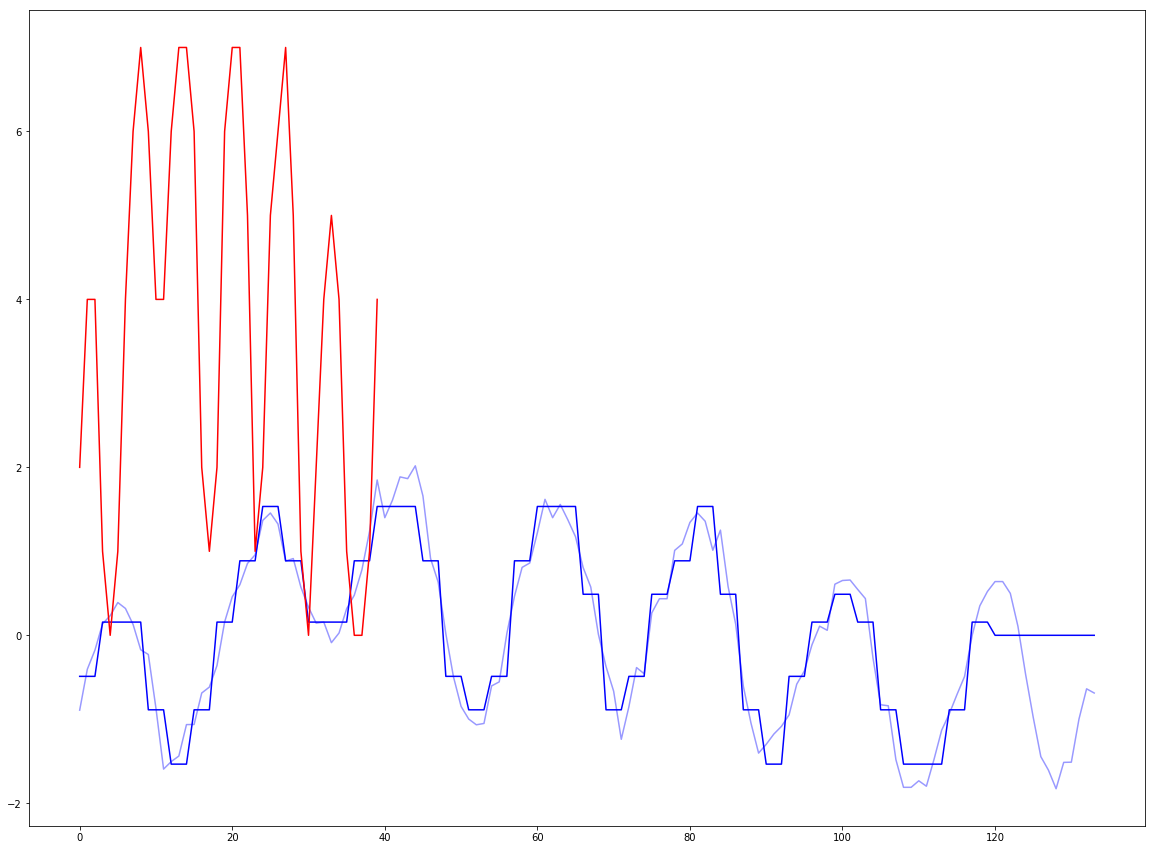

In [49]:
plt.plot(traw.ravel(), "b-", alpha=0.4)
plt.plot(tinv.ravel(), "b-")
plt.plot(tstr.ravel(), "r-")

### PYGAPBIDE

In [ ]:
sdb = []
for compact_list in se.sax_data:
    sdb.append(compact_list.ravel())

In [ ]:
sdb = [[1, 2, 3, 4],
       [1, 4, 2, 3, 5],
       [1, 2, 4, 3, 1, 2, 3, 1],
       [1, 2, 4, 3, 1],
       [1, 3, 5],
       [2, 3, 4],
       [2, 1, 5],
       [3, 5, 3, 1],
       [2, 4, 1, 5, 2, 3, 3]]

In [ ]:
g = pygb.Gapbide(sdb, 3, 0, 2)
g.run()